##**K-Means clustering**

we are just grouping the data depends on the different catagories 

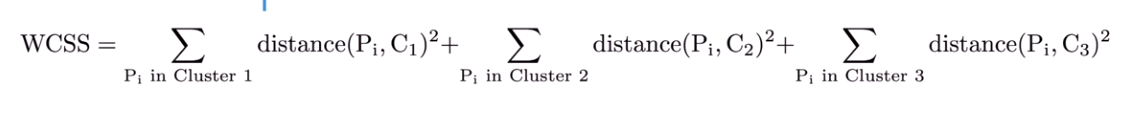

More cluster we have less the WCSS we get, polt the WCSS and the K value , the wlbow point will be the optimal K value 

we are finding the features of the data , so we will create the dependent variable , so that we can track the new data features 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
x = data.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

##**Elbow method to find the optimal number of Cluster**

In [17]:
from sklearn.cluster import KMeans 
wcss = []
for i in range(1,15):
  Kmeans = KMeans(n_clusters = i, n_init='auto',init='k-means++', random_state = 42 )
  Kmeans.fit(x)
  wcss.append(Kmeans.inertia_)


###**plot WCSS**

##**Train the K-means model**

Text(0, 0.5, 'WCSS value')

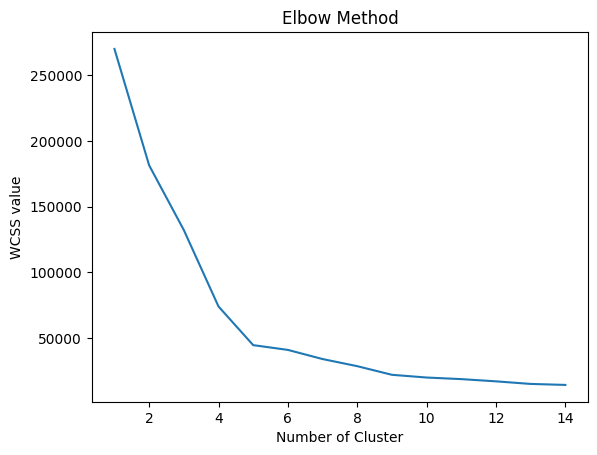

In [35]:
plt.plot(range(1,15),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS value')

###**Build the Dependent variables**

In [26]:
Kmeans = KMeans(n_clusters = 5, n_init='auto',init='k-means++', random_state = 42 )
#fit-predict also determine the dependent variable that we can make prediction of
y_kmeans = Kmeans.fit_predict(x)

In [27]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


##**Visualizing the Cluesters** 

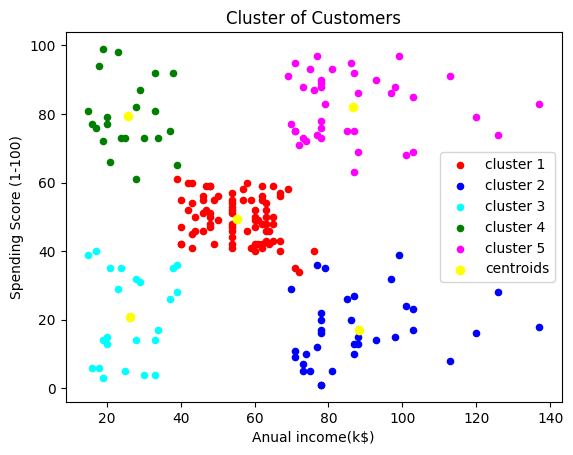

In [36]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=20 ,color='red',label='cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=20 ,color='blue',label='cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=20 ,color='cyan',label='cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=20 ,color='green',label='cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=20 ,color='magenta',label='cluster 5')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1] ,color='yellow', label='centroids' )
plt.title('Cluster of Customers')
plt.xlabel('Anual income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()